DS8 Tutoring Wk1

In [16]:
# HIDDEN

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

Welcome to week one!

Let's start by loading the file top250_movies.txt into the table movies.

In [17]:
#sol
movies = Table.read_table('top250_movies.txt')
movies

Votes,Rating,Title,Year
55784,8.3,The Kid,1921
54651,8,Salinui chueok,2003
496833,8.5,Alien,1979
151256,8.4,Das Boot,1981
692753,9,The Godfather: Part II,1974
1166532,8.9,Pulp Fiction,1994
141768,8.1,Ben-Hur,1959
49135,8,The Man Who Shot Liberty Valance,1962
124671,8,Per un pugno di dollari,1964
511177,8.3,Requiem for a Dream,2000


Since 250 rows is a lot, we want to look just at 100 rows from this table. 
We'll write code to randomly select 100 different rows from this table.

Start by creating an empty list `rowNums`.


In [18]:
#sol
rowNums = []

Then generate 100 random integers (from 0 to 249) to put inside `rowNums`, making sure that there are no repeats.

*Hint:* Use for loops. How many times do you need to iterate?
To account for the fact that you might have generated a repeat, use a nested while loop. What do you need to keep track of whether or not there has been a repeat?


*Hint for Method 2:* Use np.random.choice(). Read the doc:http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.choice.html
How does it work? What are its inputs and outputs? Remember if you're doing both, you want to reset `rowNums` beforehand so you don't end up with 200 numbers!

In [19]:
#sol
for i in range(100):
    num = np.random.randint(0,249)
    repeat = num in rowNums
    while (repeat==True):
        num = np.random.randint(0,249)
        repeat = num in rowNums
    
    rowNums.append(num)
    
#sol2
rowNums = np.random.choice(range(250), size=100, replace=False)


    


Excellent. Now we have a list of row numbers. We'll use it to sample from the table. Was this a deterministic or probability sample?

If your answer was deterministic, how might we have chosen a probability sample?
If your answer was probability, how might we have chosen a deterministic sample?


#sol
Probability sample, the chance of each row being selected is 1/250.
We could have chosen a deterministic sample by selecting the first 100 rows.

Use `rowNums` to select 100 rows from the table, save it in the variable `shortMov`.

#sampling

In [20]:
#sol
shortMov = movies.take(rowNums)
shortMov

Votes,Rating,Title,Year
102735,8.1,Mary and Max,2009
294394,8.2,Casino,1995
26012,8,Kumonosu-jô,1957
500576,8,"Monsters, Inc.",2001
689541,8.6,Interstellar,2014
1074146,8.9,The Lord of the Rings: The Return of the King,2003
444534,8.3,Taxi Driver,1976
433487,8.1,The Bourne Ultimatum,2007
156432,8.3,Some Like It Hot,1959
474068,8.4,Le fabuleux destin d'Amélie Poulain,2001


Now we want to draw some histograms based on the ratings for these movies.
Let's pivot the table by ratings (pivot column) and then year (pivot row), and have the pivot values be the sum of the votes.
Save this pivoted table in `ratingYear`.

In [21]:
#sol
ratingYear = shortMov.pivot('Year', 'Rating','Votes',np.sum) 
ratingYear

Rating,1926,1927,1931,1936,1939,1940,1941,1942,1944,1946,1949,1950,1952,1953,1954,1956,1957,1959,1960,1961,1962,1965,1966,1969,1971,1973,1974,1975,1976,1977,1979,1980,1981,1982,1983,1984,1985,1986,1989,1990,1991,1992,1993,1994,1995,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2009,2010,2011,2012,2013,2014,2015
8,0,0,0,0,0,0,0,0,0,66622,0,0,0,0,0,56671,26012,0,0,57842,0,0,32385,0,0,87591,0,454145,0,0,0,0,0,37972,0,527274,0,83941,0,0,0,0,0,57644,415809,0,583004,0,0,500576,0,0,0,0,0,0,0,0,0,862016,0,849183,0
8.1,0,0,0,0,452026,55793,0,0,0,35983,0,0,0,31003,92244,0,0,61776,0,0,0,0,52573,134552,0,0,0,0,0,169982,0,0,0,379927,0,0,0,242381,0,0,0,0,95212,0,0,0,0,0,156030,0,0,647120,0,596880,0,1137638,224334,735450,0,0,359121,0,0
8.2,46332,0,0,0,69510,78216,0,0,0,0,0,0,0,0,89233,0,55861,0,0,0,0,0,0,0,0,0,192744,0,0,0,0,210647,0,415615,0,0,0,0,0,0,0,0,0,0,294394,529800,473988,0,0,0,0,0,182525,700999,0,0,0,0,0,137310,0,0,0
8.3,0,98794,0,0,0,0,0,0,86715,0,101785,74178,132823,0,0,0,0,156432,96190,0,188160,135556,0,0,489807,0,0,0,444534,0,0,0,0,0,0,0,0,0,453748,0,0,248514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133760,0,0,0,0
8.4,0,0,0,0,0,117590,268905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,556811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,474068,0,311070,0,0,0,0,0,0,0,997350,0,0,0
8.5,0,0,92375,121668,0,0,0,350551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,403754,0,585474,0,0,0,625463,0,0,0,0,0,0,0,0,0,694602,0,0,0,0,0,0,0,763871,0,0,0,0,0,0,264333,79615
8.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,767224,0,0,635139,0,358305,0,0,0,0,476501,0,0,0,0,0,0,0,0,0,0,689541,0
8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,206216,0,0,0,0,0,0,0,0,0,0,0,0,606395,0,770011,0,0,0,0,0,0,0,0,0,644556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1271949,0,0,0,0,0
8.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1177098,0,1099087,0,0,0,0,0,0,0,0,0,0,0,0,0
8.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1074146,0,0,0,0,0,0,0,0,0,0,0


Take a look at this pivoted table. What does it tell us? 
What does it mean for a cell to be 0?

#sol
1. Tells us total number of votes for a specific rating in any given year. 
2. 0 means there were no movies of that rating in that year.

The table `ratingYear` is useful, but it doesn't help us visualize how many movies were in each rating. 
Using `shortMov`, create a table ratings that contains *only* the column of ratings.

In [22]:
#sol
ratings = shortMov.select('Rating')

Make a histogram with ratings. Have bins that go in increments of .1 starting from the lowest value in ratings all the way to 10.

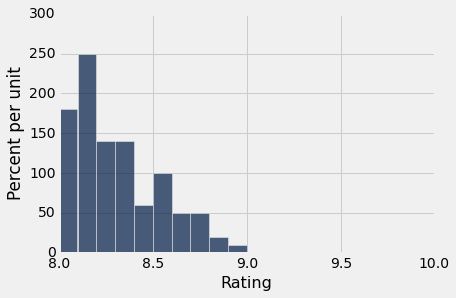

In [23]:
#sol
minVal = np.min(ratings.column(0))
ratings.hist(bins=np.arange(minVal,10.1,.1))

Let's see how our histogram compares to the entire 250 movies dataset.
Draw another histogram using the exact same bins as you did above, but this time use the table `fullRatings` that contains a column of all 250 ratings.

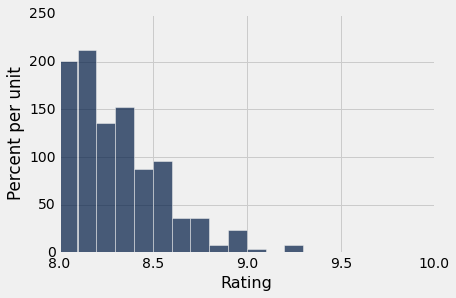

In [24]:
#sol
fullRatings = movies.select("Rating")
fullRatings.hist(bins=np.arange(minVal,10.1,.1))

Do the two histograms look similar? How might we produce a more similar looking histogram without increasing the number of rows selected (100)?

#sol
We could sample with replacement.

Congratulations! You've finished your first tutoring exercise. Be sure to give your tutor feedback on what you liked, didn't like, and would like to cover in the coming weeks!